In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
##loading the dataset 
wineData = load_wine()

In [7]:
#feature and target names 
print("Features :",wineData.feature_names)
print("Labels :",wineData.target_names)

Features : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels : ['class_0' 'class_1' 'class_2']


In [8]:
#dimensions of the data
wineData.data.shape

(178, 13)

In [9]:
#splitting out the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(wineData.data,wineData.target,test_size = 0.30,random_state=0)

In [11]:
#fitting and training the model 
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
# Class count : Number of samples encountered for each class during fitting.
print("ClassLabel : ClassCount")
for classLabel,classCount in zip(classifier.classes_,classifier.class_count_):
    print(classLabel,"\t   : ",classCount)

ClassLabel : ClassCount
0 	   :  40.0
1 	   :  49.0
2 	   :  35.0


In [29]:
#prediction 
predict = classifier.predict(X_test)

********************  Classification Report *******************

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

********************  Confusion Matrix *******************



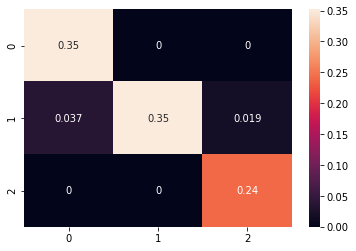

In [41]:
#evaluating the model performance 
print("********************  Classification Report *******************\n")
print(classification_report(y_test,predict))
print("********************  Confusion Matrix *******************\n")
sns.heatmap(confusion_matrix(y_test,predict)/np.sum(confusion_matrix(y_test,predict)),annot=True);